In [2]:
#Plot new data on torque from March 30, 2016 -- CKH
#The way I did the experiment, I am measuring the torsional spring constant at each angle.
#Steven was inflating to a fixed value, rotating to a variable angle 
#then measuring the force on the scale, it's kind of a more functional question "Can I press the elevator button hard enough from this angle"
#Those will be in a different file

#For k=2/n=24  (k2n24), k=3/n=18 (k3n18) and k=1/n=24 (k1n24) membranes

import numpy as np
k2n24sticklength=13 #stick length in cm, from center of membrane to where the corner of the stick hits the bump on the scale
#Need it for calculating torque
k2n24angleMidpoint=[5,28,52, 75, 94]#Average of start & stop angle for each measurement. Units: degrees
k2n24angleRange=[5,5,7,5,4]#Half the difference start and stop angle for each meas. this could be considered the angle range for which the measurement is valid
k2n24Weight=[4,6,9,10,12]#Scale weight in mm as I roll back from the stop angle to horizontal
k2n24PressureAvg=[0.15,0.47,0.70,0.90,1.2]#Kept track of the pressure in psi on the 0-3psi gauge-- this is avg of start & stop values for each meas
k2n24PressureRange=[0.15,0.05,0.05,0.05,0.1] #and half the difference between the start and stop pressure
k2n24TorqueNm=[weight/101.97*k2n24sticklength*0.01 for weight in k2n24Weight]

#additional data brought in from 3/30 ckh lab book on 4/5
k1n32sticklength=13 #cm
k1n32angleMidpoint=[5,25,50,70]#degreees
k1n32angleRange=[5,5,5,5] #degrees
k1n32Weight=[2.2,3.0,4.6,3.45]#grams
k1n32PressureAvg=[0.1,0.475,0.825,1.39]#psi
k1n32PressureRange=[0.1,0.075,0.075,0.24] #psi
k1n32TorqueNm=[weight/101.97*k1n32sticklength*0.01 for weight in k1n32Weight] #Nm

k3n18sticklength=14 #cm
k3n18angleMidpoint=[5,24,45,61,70,90,112,135]#degreees
k3n18angleRange=[5,4,5,5,5,5,6,5] #degrees
k3n18Weight=[6,4,4,1.59,1.48,1.5,1.45,1.6]#grams
k3n18PressureAvg=[0.15,0.54,0.7,0.85,0.79,0.95,1.15,1.54]#psi
k3n18PressureRange=[0.075,0.06,0.05,0.05,0.04,0.05,0.05,0.138] #psi
k3n18TorqueNm=[weight/101.97*k3n18sticklength*0.01 for weight in k3n18Weight] #Nm


k1n32TorqueNm,k2n24TorqueNm,k3n18TorqueNm #check it out

([0.0028047464940668828,
  0.0038246543100912034,
  0.005864469942139845,
  0.004398352456604884],
 [0.005099539080121605,
  0.007649308620182407,
  0.01147396293027361,
  0.012748847700304012,
  0.015298617240364814],
 [0.008237716975581053,
  0.005491811317054036,
  0.005491811317054036,
  0.0021829949985289793,
  0.002031970187309993,
  0.002059429243895263,
  0.0019907816024320878,
  0.0021967245268216147])

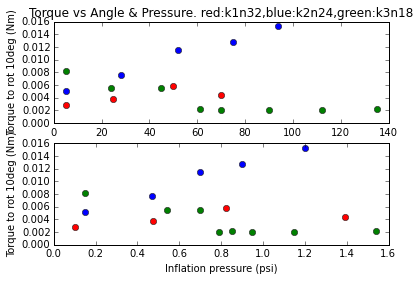

In [3]:
#Plot the torque per degree at each angle and at each pressure
#Like, at angle A it takes
#t amount of torque to push back the rotation by d degrees
#This is the torsional "spring constant" (except it's not really constant) for a linear spring f=kx, k = delta f/delta x where k might be non uniform in x
#Here we have t= k * alpha so could measure k = delta t/delta angle = k2n24TorqueNm/(2*k2n24angleRange) at each angle
%matplotlib inline
from matplotlib import pyplot as plt

plt.subplot(2,1,1)
plt.plot(k2n24angleMidpoint,k2n24TorqueNm,'bo')
plt.hold('True')
plt.plot(k1n32angleMidpoint,k1n32TorqueNm,'ro')
plt.plot(k3n18angleMidpoint,k3n18TorqueNm,'go')

plt.title('Torque vs Angle & Pressure. red:k1n32,blue:k2n24,green:k3n18')
plt.xlabel('Rotation angle (degrees)')
plt.ylabel('Torque to rot 10deg (Nm)')
plt.subplot(2,1,2)
plt.plot(k2n24PressureAvg,k2n24TorqueNm,'bo')
plt.hold ('True')
plt.plot(k1n32PressureAvg,k1n32TorqueNm,'ro')
plt.plot(k3n18PressureAvg,k3n18TorqueNm,'go')
plt.xlabel('Inflation pressure (psi)')
plt.ylabel('Torque to rot 10deg (Nm)')

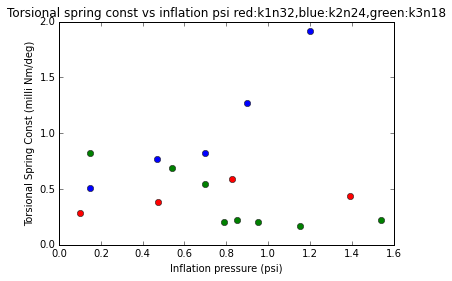

In [4]:
#Still need to divide each torque value by angular range to get the spring constant
k2n24TorsSprConst=np.divide (k2n24TorqueNm,k2n24angleRange)/2*1000 #put into milli newtons
k1n32TorsSprConst=np.divide (k1n32TorqueNm,k1n32angleRange)/2*1000 #put into milli newtons
k3n18TorsSprConst=np.divide (k3n18TorqueNm,k3n18angleRange)/2*1000 #put into milli newtons
plt.plot(k2n24PressureAvg,k2n24TorsSprConst,'bo')
plt.hold('True')
plt.plot(k1n32PressureAvg,k1n32TorsSprConst,'ro')
plt.plot(k3n18PressureAvg,k3n18TorsSprConst,'go')

plt.xlabel('Inflation pressure (psi)')
plt.ylabel('Torsional Spring Const (milli Nm/deg)')
plt.title('Torsional spring const vs inflation psi red:k1n32,blue:k2n24,green:k3n18')

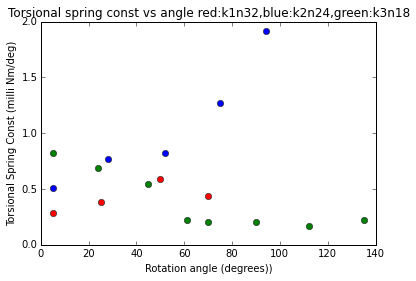

In [6]:
#plot it vs angle instead of pressure

plt.plot(k2n24angleMidpoint,k2n24TorsSprConst,'bo')
plt.hold('True')
plt.plot(k1n32angleMidpoint,k1n32TorsSprConst,'ro')
plt.plot(k3n18angleMidpoint,k3n18TorsSprConst,'go')

plt.xlabel('Rotation angle (degrees))')
plt.ylabel('Torsional Spring Const (milli Nm/deg)')
plt.title('Torsional spring const vs angle red:k1n32,blue:k2n24,green:k3n18')

In [ ]:
#Inconsistent behavior...the k=3 stick had less bonding area as pressure went up
#and the tip became pointy & egglike, so is it a fair comparison?
#We can say the torsional spring constants are approx 0.5 mNm per degree
#and possibly, compare that to how much torque it takes to twist the center of a plain EcoFlex 10 membrane
#by 10 degrees at 0 psi. Is the torsional spring constant similar with/without Kevlar reinforcement?
#you would think it would go way way up near the end of the range as you begin to stretch Kevlar